In [ ]:
!nvidia-smi

Tue Nov 28 06:52:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test.csv')

In [ ]:
# Inspect our Training data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Get our training labels
labels = train['label'].values

In [ ]:
# View the unique labels, 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
# Drop Training Labels from our training data so we can separate it
train.drop('label', axis = 1, inplace = True)

In [ ]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [ ]:
# View our labels
labels
# len(labels[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


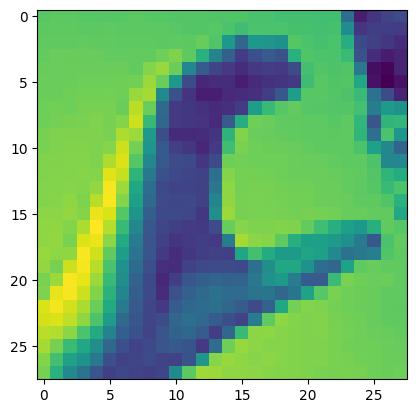

In [ ]:
# Inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [ ]:
# Split our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
# Start loading our tensorFlow modules and define our batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 15

In [ ]:
# Scale our images
x_train = x_train / 255
x_test = x_test / 255

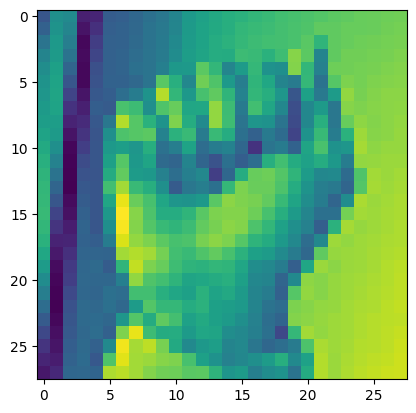

In [ ]:
# Reshape them into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [ ]:
# Check for GPU availability and set it up
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available")

GPU is available


In [ ]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam


start_time_serial = time.time()


model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# Compile our Model
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [ ]:
# Train our Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)


# Record end time for serial execution
end_time_serial = time.time()

# Calculate elapsed time for serial execution
elapsed_time_serial = end_time_serial - start_time_serial
print(f"Time taken for serial execution: {elapsed_time_serial} seconds")


Epoch 1/15
151/151 [==============================] - 3s 9ms/step - loss: 3.1772 - accuracy: 0.0429 - val_loss: 3.1762 - val_accuracy: 0.0418
Epoch 2/15
151/151 [==============================] - 1s 8ms/step - loss: 3.1762 - accuracy: 0.0444 - val_loss: 3.1761 - val_accuracy: 0.0418
Epoch 3/15
151/151 [==============================] - 1s 7ms/step - loss: 3.1761 - accuracy: 0.0464 - val_loss: 3.1761 - val_accuracy: 0.0418
Epoch 4/15
151/151 [==============================] - 1s 7ms/step - loss: 3.1760 - accuracy: 0.0457 - val_loss: 3.1761 - val_accuracy: 0.0418
Epoch 5/15
151/151 [==============================] - 1s 8ms/step - loss: 3.1758 - accuracy: 0.0457 - val_loss: 3.1760 - val_accuracy: 0.0418
Epoch 6/15
151/151 [==============================] - 1s 9ms/step - loss: 3.1759 - accuracy: 0.0445 - val_loss: 3.1761 - val_accuracy: 0.0418
Epoch 7/15
151/151 [==============================] - 1s 9ms/step - loss: 3.1759 - accuracy: 0.0456 - val_loss: 3.1761 - val_accuracy: 0.0418
Epoch 

In [ ]:
import cv2
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('mymodel.keras')

cap = cv2.VideoCapture(1)

while True:
    ret, frame = cap.read()

    if not ret:  # Check if the frame was read successfully
        print("Error reading frame")
        break

    ##############################
    frame = cv2.flip(frame, 1)

    # Define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)

    if roi is not None:  # Check if roi is not None before processing
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        roi_resized = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)
        cv2.imshow('roi scaled and gray', roi_resized)

        copy = frame.copy()
        cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

        # Prepare the ROI for prediction
        roi_input = roi_resized.reshape(1, 28, 28, 1)

        # Make prediction using the loaded model
        result = str(model.predict(roi_input).argmax())
        cv2.putText(copy, result, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
        cv2.imshow('frame', copy)

    else:
        print("ROI is None")

    if cv2.waitKey(1) == 13:  # 13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()


Error reading frame


In [ ]:
# Create function to match label to letter
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

In [ ]:
# Save our Model
model.save("mymodel.keras")
print("Model Saved")

Model Saved


In [ ]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

with tf.device('/GPU:0'):  # This line assigns operations to GPU
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.20))

    model.add(Dense(num_classes, activation = 'softmax'))



    # Record start time
start_time = time.time()


   # Compile our Model
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Time taken for parallel execution: {elapsed_time} seconds")




Epoch 1/15
151/151 [==============================] - 3s 13ms/step - loss: 3.1774 - accuracy: 0.0431 - val_loss: 3.1764 - val_accuracy: 0.0488
Epoch 2/15
151/151 [==============================] - 1s 9ms/step - loss: 3.1762 - accuracy: 0.0442 - val_loss: 3.1760 - val_accuracy: 0.0418
Epoch 3/15
151/151 [==============================] - 1s 10ms/step - loss: 3.1761 - accuracy: 0.0458 - val_loss: 3.1760 - val_accuracy: 0.0418
Epoch 4/15
151/151 [==============================] - 1s 10ms/step - loss: 3.1760 - accuracy: 0.0456 - val_loss: 3.1759 - val_accuracy: 0.0488
Epoch 5/15
151/151 [==============================] - 1s 9ms/step - loss: 3.1759 - accuracy: 0.0454 - val_loss: 3.1759 - val_accuracy: 0.0484
Epoch 6/15
151/151 [==============================] - 1s 8ms/step - loss: 3.1758 - accuracy: 0.0446 - val_loss: 3.1760 - val_accuracy: 0.0418
Epoch 7/15
151/151 [==============================] - 1s 8ms/step - loss: 3.1758 - accuracy: 0.0457 - val_loss: 3.1760 - val_accuracy: 0.0418
Epo